In [17]:
import torch
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, Dataset

import seaborn as sns
import matplotlib.pyplot as plt
import missingno

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, label_binarize

# machine learning
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')



In [2]:
train_csv = pd.read_csv('./datasets/train.csv')
test_csv = pd.read_csv('./datasets/test.csv')
example_submission_csv = pd.read_csv('./datasets/gender_submission.csv')

In [20]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test_csv.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
print('train_df.shape: ', train_csv.shape)
print('test_df.shape', test_csv.shape)

train_df.shape:  (891, 12)
test_df.shape (418, 11)


In [23]:
train_csv.info()
train_csv.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
test_csv.info()
test_csv.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
train_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
test_csv.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [3]:
excluded_cols = ['PassengerId', 'Name', 'Cabin', 'Ticket']
train_df = train_csv.drop(excluded_cols, axis=1)
test_df = test_csv.drop(excluded_cols, axis=1)


In [4]:
train_df.shape, test_df.shape

((891, 8), (418, 7))

<AxesSubplot:>

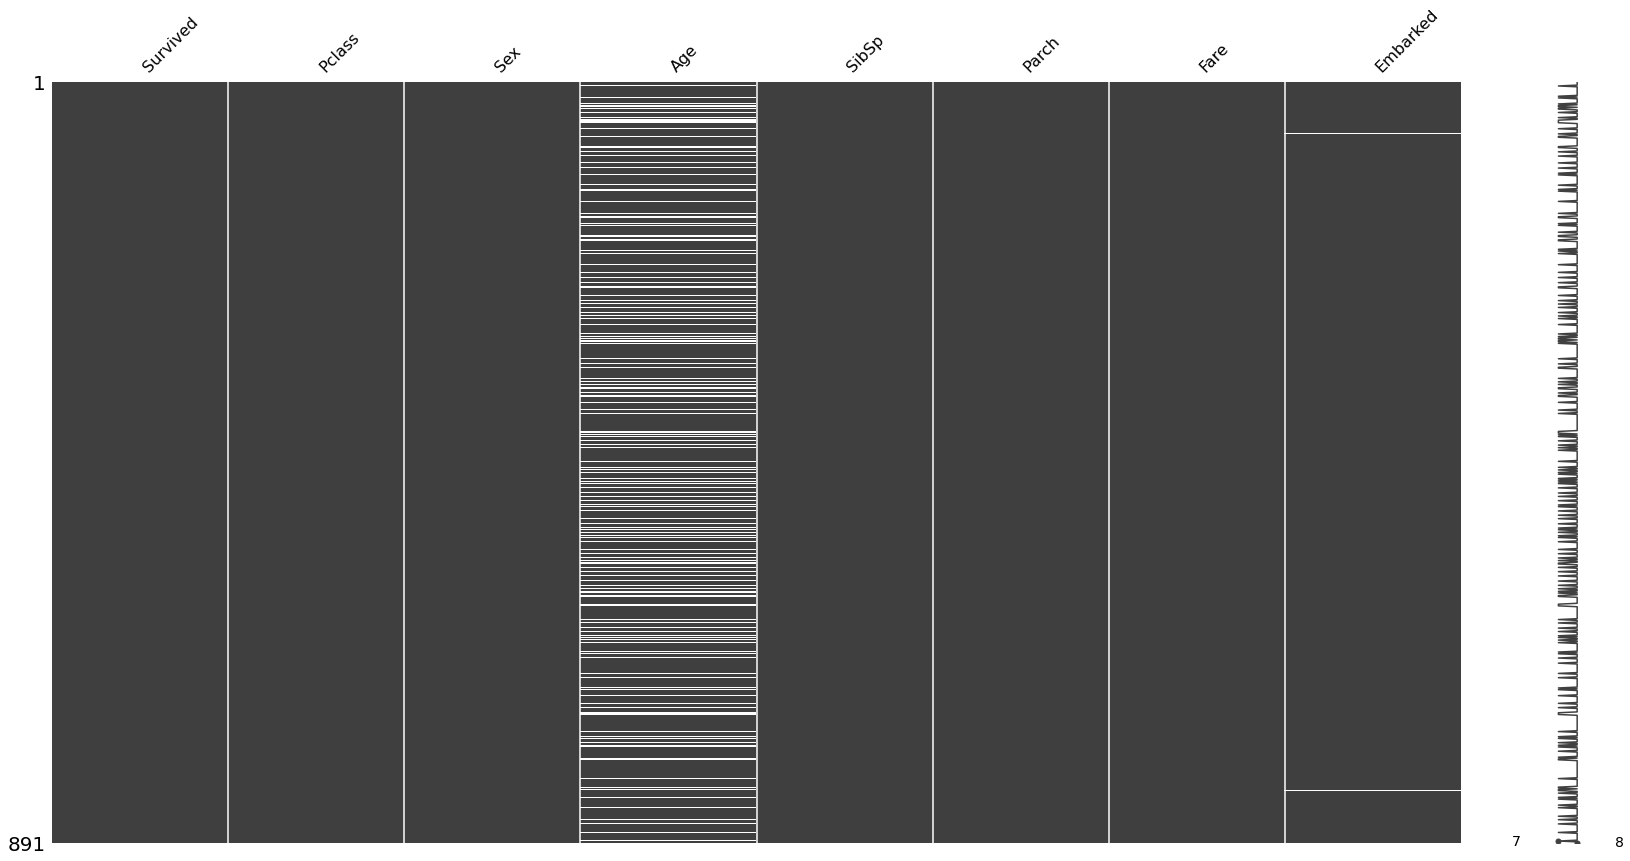

In [5]:
missingno.matrix(train_df, figsize=(28, 14))

In [6]:
# plot function for categorical feature
def cat_plot(feature):
    fig = plt.figure(figsize=(14, 8))
    sns.countplot(x=feature, hue='Survived', data=train_df)

    plt.xlabel(feature, size=15, labelpad=5)
    plt.ylabel('Passengers', size=15, labelpad=15)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    plt.legend(['Not Survived', 'Survived'], loc='upper cenyer', prop={'size': 14})
    plt.title('Survival Count in {}'.format(feature), size=15)
    plt.show()

    print(train_df[feature].value_counts())

In [7]:
# plot function for continuous features
def con_plot(feature):
    fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
    fig.tight_layout(h_pad=6)

    survived = train_df['Survived'] == 1

    # Distribution of sirvival in feature
    sns.distplot(train_df[~survived][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0])
    sns.distplot(train_df[survived][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0])

    # Distribution of feature in dataset
    sns.distplot(train_df[feature], label='Training set', hist=False, color='#e74c3c', ax=axs[1])
    sns.distplot(test_df[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1])

    axs[0].set_xlabel(feature, size=15, labelpad=5)
    axs[1].set_xlabel(feature, size=15, labelpad=5)
    axs[0].set_ylabel('')
    axs[1].set_ylabel('')

    axs[0].tick_params(axis='x', labelsize=15)
    axs[1].tick_params(axis='x', labelsize=15)
    axs[0].tick_params(axis='y', labelsize=15)
    axs[1].tick_params(axis='y', labelsize=15)

    axs[0].legend(loc='upper right', prop={'size': 14})
    axs[1].legend(loc='upper right', prop={'size': 14})

    axs[0].set_title('{} Survival Distribution'.format(feature), size=15)
    axs[1].set_title('{} Distribution'.format(feature), size=15)

    plt.show()

/home/heine/Tools/anaconda3/envs/deep_learning/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


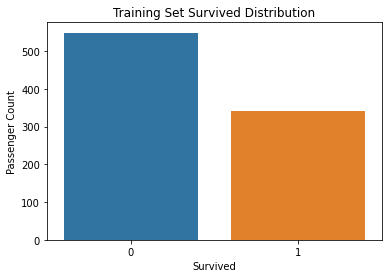

0    549
1    342
Name: Survived, dtype: int64


In [8]:
sns.countplot(train_df['Survived'])
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.title('Training Set Survived Distribution')
plt.show()

print(train_df['Survived'].value_counts())

In [9]:
for df in [train_df, test_df]:
    df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('mean'), inplace=True)

print(train_df['Age'].isnull().sum())
print(test_df['Age'].isnull().sum())

0
0


In [11]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
test_df['Fare'].isnull().sum()

0

In [12]:
train_df.dropna(subset=['Embarked'], inplace=True)
train_df['Embarked'].isnull().sum()

0

In [13]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
le = LabelEncoder()

for df in [train_df, test_df]:
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Embarked'] = le.fit_transform(df['Embarked'])

In [19]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [20]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [21]:
Y_train = train_df.loc[:, ['Survived']]
X_train = train_df.drop(['Survived'], axis=1)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [23]:
ss = StandardScaler()
ss.fit(X_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [27]:
def model_predict(model):
    cv = cross_val_score(model, x_train, y_train, cv=5)
    print('Cross Validation Score: {}'.format(cv))
    print('Mean Cross Validation Score: {}'.format(cv.mean()))

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = round(accuracy_score(y_pred, y_test)*100, 2)
    print('Model Accuracy: {}%'.format(accuracy))
    model_pred = model.predict(ss.transform(test_df))
    return model_pred

In [25]:
def model_submission(y_pred):
    prediction = {'PassengerId': test_csv.PassengerId, 'Survived': y_pred}
    submission = pd.DataFrame(data=prediction)
    print(submission['Survived'].value_counts())
    return submission

In [28]:
lr = LogisticRegression(max_iter=2000, C=1.5, penalty='l1', solver='liblinear')
lr_pred = model_predict(lr)
lr_submission = model_submission(lr_pred)
lr_submission.to_csv('lr_submission.csv', index=False)

Cross Validation Score: [0.83216783 0.83802817 0.79577465 0.79577465 0.78169014]
Mean Cross Validation Score: 0.8086870875603269
Model Accuracy: 79.78%
0    259
1    159
Name: Survived, dtype: int64


In [29]:
sgd = SGDClassifier()
sgd_pred = model_predict(sgd)
sgd_submission = model_submission(sgd_pred)
sgd_submission.to_csv('sgd_submission.csv', index=False)

Cross Validation Score: [0.72727273 0.76056338 0.74647887 0.80985915 0.75352113]
Mean Cross Validation Score: 0.759539052496799
Model Accuracy: 80.34%
0    256
1    162
Name: Survived, dtype: int64


In [30]:
gnb = GaussianNB()
gnb_pred = model_predict(gnb)
gnb_submission = model_submission(gnb_pred)
gnb_submission.to_csv('gnb_submission.csv', index=False)

Cross Validation Score: [0.8041958  0.79577465 0.78873239 0.82394366 0.75352113]
Mean Cross Validation Score: 0.793233527036344
Model Accuracy: 77.53%
0    239
1    179
Name: Survived, dtype: int64


In [31]:
svc = SVC(gamma=1.0, probability=True)
svc_pred = model_predict(svc)
svc_submission = model_submission(svc_pred)
svc_submission.to_csv('svc_submission.csv', index=False)

Cross Validation Score: [0.82517483 0.85211268 0.78873239 0.81690141 0.8028169 ]
Mean Cross Validation Score: 0.8171476410913032
Model Accuracy: 80.34%
0    261
1    157
Name: Survived, dtype: int64


In [32]:
linear_svc = LinearSVC()
linear_svc_pred = model_predict(linear_svc)
linear_svc_submission = model_submission(linear_svc_pred)
linear_svc_submission.to_csv('linear_svc_submission.csv', index=False)

Cross Validation Score: [0.83216783 0.83802817 0.8028169  0.78873239 0.75352113]
Mean Cross Validation Score: 0.8030532847434255
Model Accuracy: 79.78%
0    259
1    159
Name: Survived, dtype: int64
